# test13_서상서

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt 

plt.rc('font', family='NanumBarunGothic') 

seed = 156
np.random.seed(seed)
tf.random.set_seed(seed)

## 1. 데이터를 로드 

In [ ]:
fd = pd.read_csv("/content/sample_data/test13.csv",)
display(df.info(), df.head(6))

In [ ]:
df.drop(columns = ["id", "Unnamed: 32"], axis = 1,inplace = True)

In [ ]:
df.head()

In [ ]:
dataset = df.values
X = dataset[:, 1:].astype(float)
Y_obj = dataset[:, 0]
X.shape

(569, 30)

In [ ]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y

## 2. train,test으로 분리 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = seed)

## 3. 딥러닝 모델을 업데이트 하고, 베스트 모델 생성

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim = 30, activation='relu')) # 입력층 + 은닉층 , 입력값은 17개
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 출력층, 출력값은 1가지.

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import os
MODEL_DIR = "/content/sample_data/model/"

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [ ]:
modelpath = MODEL_DIR+"{epoch:02d}-{val_loss:.4f}.hdf5"
modelcheckpoint = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', save_best_only=True, verbose=1)

history = model.fit(X_train, Y_train, batch_size=10, epochs = 100, verbose =1,validation_data=(X_test, Y_test), \
                    callbacks=[modelcheckpoint])

## 4. 그래프로 출력

In [ ]:
y_vloss=  history.history['val_loss']
y_acc   =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


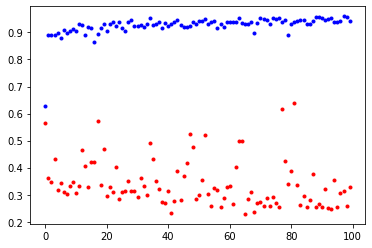

In [ ]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3, label ='테스트')
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)

## 5. EarlyStopping

In [ ]:
earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
history = model.fit(X_train, Y_train, batch_size=10, epochs = 100, verbose =1,validation_data=(X_test, Y_test), \
                    callbacks=[modelcheckpoint, earlyStopping])

## 6. 실제값과 예측값 보기 

In [35]:
Y_prediction = model.predict(X_test).flatten()

Y_prediction

for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제 판정 : {:.0f}, 예측 : {:.0f}".format(label, prediction))

실제 판정 : 0, 예측 : 0
실제 판정 : 1, 예측 : 1
실제 판정 : 0, 예측 : 0
실제 판정 : 1, 예측 : 1
실제 판정 : 0, 예측 : 0
실제 판정 : 0, 예측 : 0
실제 판정 : 0, 예측 : 0
실제 판정 : 0, 예측 : 0
실제 판정 : 0, 예측 : 0
실제 판정 : 1, 예측 : 1


In [ ]:
print(e.classes_)

['B' 'M']


In [ ]:
print(e.inverse_transform([0,1]))

['B' 'M']
